Imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

import os
from os import listdir
from os.path import isfile, join
import glob
pd.set_option('display.max_columns', 50)

#### Read all files and check the dfs

In [58]:
households = pd.read_csv("..\Datalogs\Households.csv")
cons_firms = pd.read_csv("..\Datalogs\Consumer_Firms.csv")
cap_firms = pd.read_csv("..\Datalogs\Capital_Firms.csv")
pboard = pd.read_csv("..\Datalogs\Public_Info_Board.csv")

Check dataframes

In [59]:
households

wealth_financial  wealth_human  expenditure_consumption  \
0                  250.0           0.0                      0.0   
1                  327.0           0.0                      0.0   
2                  905.0           0.0                      0.0   
3                  917.0           0.0                      0.0   
4                  699.0           0.0                      0.0   
...                  ...           ...                      ...   
369995            1345.0           0.0                    364.0   
369996            1097.0           0.0                    324.0   
369997            1234.0           0.0                    324.0   
369998             430.0           0.0                    324.0   
369999             729.0           0.0                    324.0   

        expenditure_tax  consumption_propensity  new_savings  \
0                   0.0                0.326548          0.0   
1                   0.0                0.668312          0.0   
2                   0.0                0.320975          0.0   
3                   0.0                0.500811          0.0   
4                   0.0                0.715792          0.0   
...                 ...                     ...          ...   
369995              0.0                0.569221        430.0   
369996              0.0                0.603258        442.0   
369997              0.0                0.516048        474.0   
369998              0.0                0.694948        411.0   
369999              0.0                0.822260        379.0   

        cash_on_hand_real_desired  cash_on_hand_desired  cash_on_hand_current  \
0                             0.0                   0.0                   0.0   
1                             0.0                   0.0                   0.0   
2                             0.0                   0.0                   0.0   
3                             0.0                   0.0                   0.0   
4                             0.0                   0.0                   0.0   
...                           ...                   ...                   ...   
369995                        0.0                 162.0                   0.0   
369996                        0.0                 146.0                   0.0   
369997                        0.0                 193.0                   0.0   
369998                        0.0                 166.0                   0.0   
369999                        0.0                 296.0                   0.0   

        saving_propensity  saving_propensity_optimist  \
0                0.187602                    0.187602   
1                0.128466                    0.128466   
2                0.125842                    0.125842   
3                0.207816                    0.207816   
4                0.160711                    0.160711   
...                   ...                         ...   
369995           0.211571                    0.211571   
369996           0.294972                    0.194972   
369997           0.318898                    0.218898   
369998           0.340799                    0.240799   
369999           0.350413                    0.250413   

        saving_propensity_pessimist  income_current  income_average  \
0                          0.287602             0.0             0.0   
1                          0.228466             0.0             0.0   
2                          0.225842             0.0             0.0   
3                          0.307816             0.0             0.0   
4                          0.260711             0.0             0.0   
...                             ...             ...             ...   
369995                     0.311571           500.0           768.0   
369996                     0.294972           500.0           498.0   
369997                     0.318898           500.0           606.0   
369998                     0.340799           500.0           490.

In [60]:
cons_firms

production_current  production_planned  production_past  quantity_sold  \
0                 6800.0                 0.0              0.0         1643.0   
1                 6200.0                 0.0              0.0         2042.0   
2                 6300.0                 0.0              0.0         3739.0   
3                 5800.0                 0.0              0.0         2590.0   
4                 6000.0                 0.0              0.0         1410.0   
...                  ...                 ...              ...            ...   
5545                 0.0                 0.0              0.0            0.0   
5546                 0.0                 0.0              0.0            0.0   
5547               169.0               169.0            790.0            0.0   
5548                 0.0                 0.0              0.0            0.0   
5549                 0.0                 0.0              0.0            0.0   

      total_income  revenue_sales  new_loan_issuance  subsidies  \
0              0.0            0.0                0.0        0.0   
1              0.0            0.0                0.0        0.0   
2              0.0            0.0                0.0        0.0   
3              0.0            0.0                0.0        0.0   
4              0.0            0.0                0.0        0.0   
...            ...            ...                ...        ...   
5545           0.0            0.0           -77081.0        0.0   
5546           0.0            0.0             1632.0        0.0   
5547           0.0            0.0           -12436.0        0.0   
5548           0.0            0.0             2304.0        0.0   
5549           0.0            0.0            99043.0        0.0   

      good_price_current  good_price_past  average_profit  \
0              13.357800         9.500000             0.0   
1              10.915800         9.500000             0.0   
2              11.317200         9.500000             0.0   
3               9.518910         9.500000             0.0   
4              10.089600         9.500000             0.0   
...                  ...              ...             ...   
5545           59.091702        77.517998             0.0   
5546           61.303799        66.383202             0.0   
5547           70.137398        49.700500         17543.0   
5548           73.444801        50.651199             0.0   
5549           61.316399        47.931999          3204.0   

      average_sale_quantity  short_term_funding_gap  long_term_funding_gap  \
0                    1643.0                     0.0                    0.0   
1                    2042.0                     0.0                    0.0   
2                    3739.0                     0.0                    0.0   
3                    2590.0                     0.0                    0.0   
4                    1410.0                     0.0                    0.0   
...                     ...                     ...                    ...   
5545                    4.0             -68098608.0               -77081.0   
5546                    5.0               -109950.0                    0.0   
5547                  485.0             -33834436.0               -12436.0   
5548                    1.0               -180227.0                    0.0   
5549                   94.0            -104678728.0              -125289.0   

      total_liabilities  labor_wage_bill  capital_costs  tax_payments  \
0                   0.0          87174.0            0.0           0.0   
1                   0.0          59124.0            0.0           0.0   
2                   0.0          63441.0            0.0           0.0   
3                   0.0          44496.0            0.0           0.0   
4                   0.0          50650.0            0.0           0.0   
...                 ...              ...            ...           ...   
5545         -3296889.0              0.0           11.0    

In [61]:
cap_firms

production_current  production_planned  production_past  quantity_sold  \
0                  680.0                 0.0              0.0          374.0   
1                  620.0                 0.0              0.0          290.0   
2                  630.0                 0.0              0.0          332.0   
3                  580.0                 0.0              0.0          275.0   
4                  600.0                 0.0              0.0          337.0   
...                  ...                 ...              ...            ...   
1845               650.0                 0.0              0.0          434.0   
1846               660.0                 0.0              0.0          165.0   
1847               580.0                 0.0              0.0          219.0   
1848               600.0                 0.0              0.0          186.0   
1849               610.0                 0.0              0.0          351.0   

      total_income  revenue_sales  new_loan_issuance  subsidies  \
0              0.0            0.0                0.0        0.0   
1              0.0            0.0                0.0        0.0   
2              0.0            0.0                0.0        0.0   
3              0.0            0.0                0.0        0.0   
4              0.0            0.0                0.0        0.0   
...            ...            ...                ...        ...   
1845           0.0            0.0                0.0        0.0   
1846           0.0            0.0                0.0        0.0   
1847           0.0            0.0                0.0        0.0   
1848           0.0            0.0                0.0        0.0   
1849           0.0            0.0                0.0        0.0   

      good_price_current  good_price_past  average_profit  \
0               13.35780              9.5             0.0   
1               10.91580              9.5             0.0   
2               11.31720              9.5             0.0   
3                9.51891              9.5             0.0   
4               10.08960              9.5             0.0   
...                  ...              ...             ...   
1845            12.35090              9.5             0.0   
1846            12.43000              9.5             0.0   
1847             9.33970              9.5             0.0   
1848            10.26510              9.5             0.0   
1849            10.61620              9.5             0.0   

      average_sale_quantity  short_term_funding_gap  long_term_funding_gap  \
0                     374.0                     0.0                    0.0   
1                     290.0                     0.0                    0.0   
2                     332.0                     0.0                    0.0   
3                     275.0                     0.0                    0.0   
4                     337.0                     0.0                    0.0   
...                     ...                     ...                    ...   
1845                  434.0                     0.0               -61422.0   
1846                  165.0                     0.0               -63347.0   
1847                  219.0                     0.0                    0.0   
1848                  186.0                     0.0               -41619.0   
1849                  351.0                     0.0               -44922.0   

      total_liabilities  labor_wage_bill  capital_costs  tax_payments  \
0                   0.0          87174.0            0.0           0.0   
1                   0.0          59124.0            0.0           0.0   
2                   0.0          63441.0            0.0           0.0   
3                   0.0          44496.0            0.0           0.0   
4                   0.0          50650.0            0.0           0.0   
...                 ...              ...            ...           ...   
1845            74360.0          74360.0            0.0    

In [62]:
pboard.head()

price_level_current  price_level_previous  cap_price_level_current  \
0              10.4820                0.0000                  9.98804   
1              10.4820               10.4820                  9.98804   
2              12.6715               10.4820                  9.98804   
3              14.6340               12.6715                  9.98804   
4              16.4216               14.6340                  9.98804   

   cap_price_level_previous  average_wage  r_rate  inflation_current  \
0                       0.0      0.000000     0.0                0.0   
1                       0.0    720.008972     0.0                0.0   
2                       0.0    718.918030     0.0                0.0   
3                       0.0    944.586975     0.0                0.0   
4                       0.0    985.754028     0.0                0.0   

   household_sentiment_sum  household_sentiment_percentage  \
0                      0.0                             0.0   
1                   4572.0                             0.0   
2                   7788.0                             0.0   
3                  10951.0                             0.0   
4                  16881.0                             1.0   

   cons_firm_sentiment_sum  cons_firm_sentiment_percentage  \
0                      0.0                             0.0   
1                      0.0                             0.0   
2                     70.0                             0.0   
3                    131.0                             0.0   
4                    185.0                             1.0   

   cap_firm_sentiment_sum  cap_firm_sentiment_percentage  machine_orders  \
0                     0.0                            0.0             0.0   
1                     0.0                            0.0           407.0   
2                     0.0                            0.0           382.0   
3                     0.0                            0.0           392.0   
4                     0.0                            0.0           405.0   

   machine_orders_planned  machine_spending  consumer_orders  \
0                     0.0               0.0              0.0   
1                     0.0            2309.0         676989.0   
2                     0.0            2169.0         537320.0   
3                     0.0            2223.0         474931.0   
4                     0.0            2296.0         452518.0   

   consumer_spending  consumption_budgets  consumer_goods_production  \
0                0.0         2.002932e+09                        0.0   
1          6531058.0         6.575281e+06                   655023.0   
2          5335415.0         5.381367e+06                   453570.0   
3          5407836.0         5.461971e+06                   468007.0   
4          5625010.0         5.684276e+06                   446881.0   

   capital_goods_production  consumer_goods_production_planned  \
0                       0.0                                0.0   
1                       0.0                           706310.0   
2                       0.0                           615733.0   
3                       0.0                           646278.0   
4                       0.0                           688424.0   

   capital_goods_production_planned  n_employed  n_unemployed  unemp_rate  \
0                               0.0         0.0           0.0      0.0000   
1                               0.0     12594.0        7406.0      0.7406   
2                               0.0      8518.0       11482.0      1.1482   
3                               0.0      8201.0       11799.0      1.1799   
4                               0.0      7820.0       12180.0      1.2180   

   empl_hires  new_empl_demand  empl_firings  empl_contract_expiries  \
0      6893.0              0.0           0.0                     0.0   
1      1770.0           -761.0         761.0                     0.0   
2      1314.0          -3252.0    

Get sums and averages for each timestep

In [75]:
households_sum = households.groupby('date').sum().reset_index()
households_avg = households.groupby('date').mean().reset_index()
cons_firms_sum = cons_firms.groupby('date').sum().reset_index()
cons_firms_avg = cons_firms.groupby('date').mean().reset_index()
cap_firms_sum = cap_firms.groupby('date').sum().reset_index()
cap_firms_avg = cap_firms.groupby('date').mean().reset_index()

Calculate number of agents

In [48]:
timestep = households['date'].max()
n_households = households.shape[0] / (timestep+1)
n_cons_firms = cons_firms.shape[0] / (timestep +1)
n_cap_firms = cap_firms.shape[0] / (timestep +1)
t = np.linspace(0,timestep, timestep +1)

## Plot the data

In [86]:
import matplotlib.pyplot as plt
import random

def plot_values(df, t, average, exclude_cols=[]):
    cols = [col for col in df.columns if col not in exclude_cols]
    num_plots = len(cols)
    num_cols = 3
    num_rows = num_plots // num_cols + (num_plots % num_cols > 0)
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
    axs = axs.flatten()

    for i, column in enumerate(cols):
        title = column + ": (average)" if average else column + ": (sum)"
        color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        axs[i].plot(t, df[column], label=title, color=color)
        axs[i].set_xlabel('Timestep')
        axs[i].set_ylabel('Values')
        axs[i].set_title(column)
        axs[i].legend()
    plt.tight_layout()
    plt.show()


### Plot Households

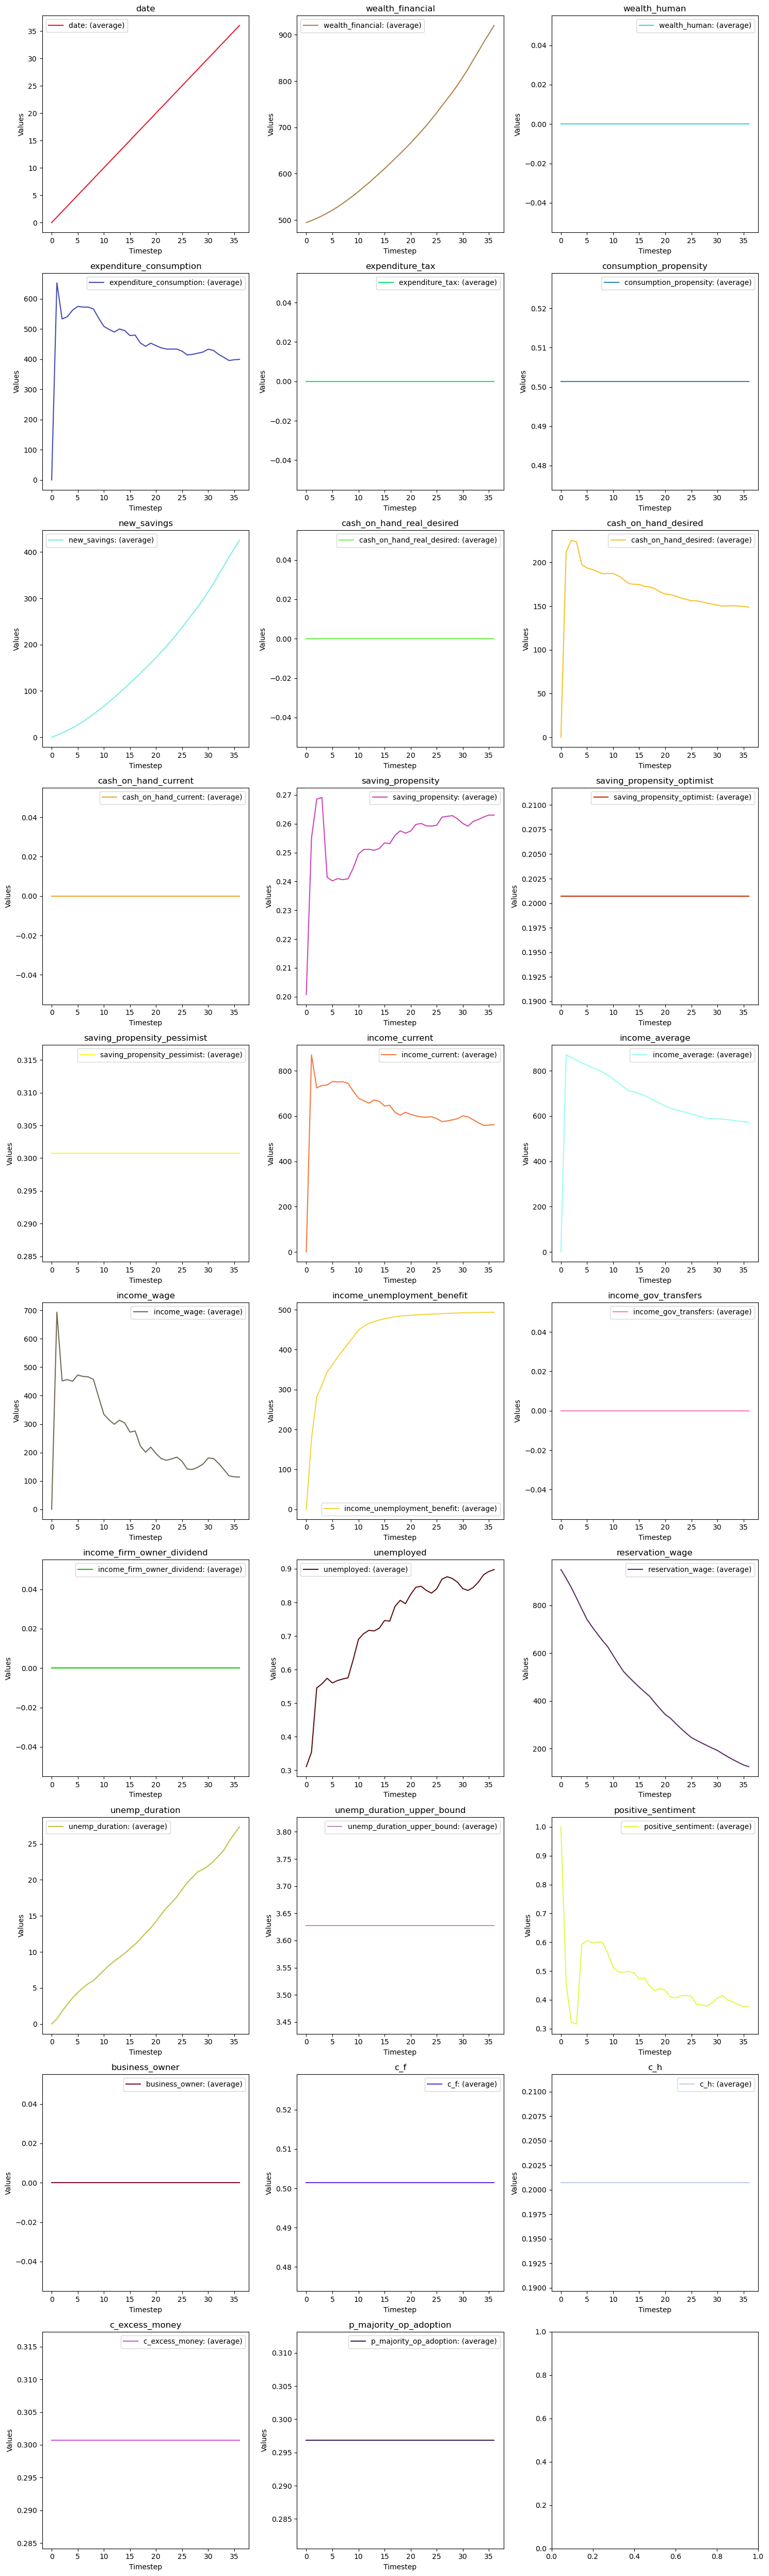

In [87]:
#cols_to_exclude = ['date']
#plot_values(households_sum,t,False, cols_to_exclude)
cols_to_exclude = ['date']
plot_values(households_avg,t,True, cols_to_exclude)

### Plot Consumer Firms

In [90]:
print("------ Plotting consumer firms -----")
cols_to_exclude = ['date']
#plot_values(cons_firms_sum,t,False, cols_to_exclude)
cols_to_exclude = ['date']
plot_values(cons_firms_avg,t,True, cols_to_exclude)

------ Plotting capital firms -----


### Capital Firms

------ Plotting capital firms -----


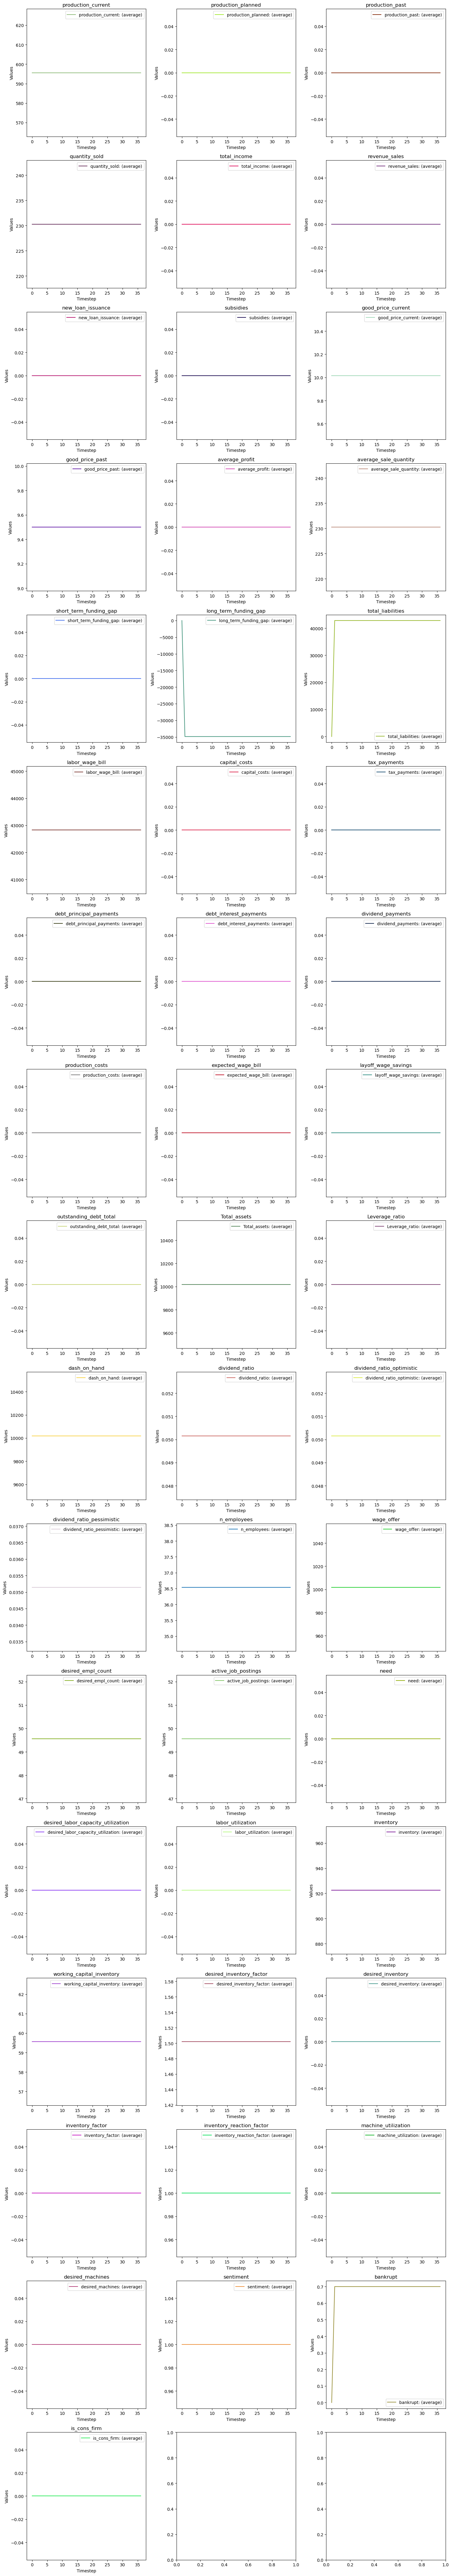

In [91]:
print("------ Plotting capital firms -----")
cols_to_exclude = ['date']
#plot_values(cap_firms_sum,t,False, cols_to_exclude)
cols_to_exclude = ['date']
plot_values(cap_firms_avg,t,True, cols_to_exclude)

### Print Public Board

In [92]:
cols_to_exclude = ['date', "price_level_previous"]
plot_values(pboard,t,False, cols_to_exclude)

## Public Board

To do: